In [27]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.spatial
import functools

%matplotlib inline

In [28]:
### Kernel function generators
def linear_kernel(X1, X2):
    """
    计算两组向量之间的线性核。
    参数：
        X1 - 一个 n1xd 矩阵，其中每行包含一个向量 x1_1,...,x1_n1
        X2 - 一个 n2xd 矩阵，其中每行包含一个向量 x2_1,...,x2_n2
    返回：
        大小为 n1xn2 的矩阵，位置 i,j 处的值为 x1_i^T x2_j
    """
    K = X1 @ X2.T
    return K #加分项TODO

def RBF_kernel(X1,X2,sigma):
    """
    计算两组向量之间的 RBF 核
    参数：
        X1 - 一个 n1xd 矩阵，其中每行包含一个向量 x1_1,...,x1_n1
        X2 - 一个 n2xd 矩阵，其中每行包含一个向量 x2_1,...,x2_n2
        sigma - RBF/高斯核的带宽（即标准差）
    返回：
        大小为 n1xn2 的矩阵，位置 i,j 处的值为 exp(-||x1_i-x2_j||^2/(2 sigma^2))
    """
    X1_norm = np.sum(X1**2, axis=1, keepdims=True)  # n1 x 1
    X2_norm = np.sum(X2**2, axis=1)  # 1 x n2

    X1_X2_dot = np.dot(X1, X2.T)  # n1 x n2

    dist = X1_norm + X2_norm - 2 * X1_X2_dot  # n1 x n2

    K = np.exp(-dist / (2 * sigma**2))
    return K #TODO

def polynomial_kernel(X1, X2, offset, degree):
    """
    计算两组向量之间的不齐次多项式核
    参数：
        X1 - 一个 n1xd 矩阵，其中每行包含一个向量 x1_1,...,x1_n1
        X2 - 一个 n2xd 矩阵，其中每行包含一个向量 x2_1,...,x2_n2
        offset, degree - 核的两个参数
    返回：
        大小为 n1xn2 的矩阵，位置 i,j 处的值为 (offset + <x1_i,x2_j>)^degree
    """
    K = (X1 @ X2.T + offset) ** degree
    return K #加分项TODO


In [29]:
Dx = np.array([-4,-1,0,2]).reshape(-1,1)
linear_kernel(Dx, Dx)

array([[16,  4,  0, -8],
       [ 4,  1,  0, -2],
       [ 0,  0,  0,  0],
       [-8, -2,  0,  4]])

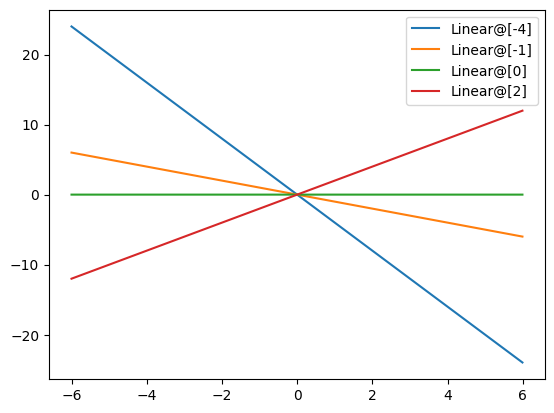

In [30]:
# PLot kernel machine functions

plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
y = linear_kernel(prototypes, xpts) 
for i in range(len(prototypes)):
    label = "Linear@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show()

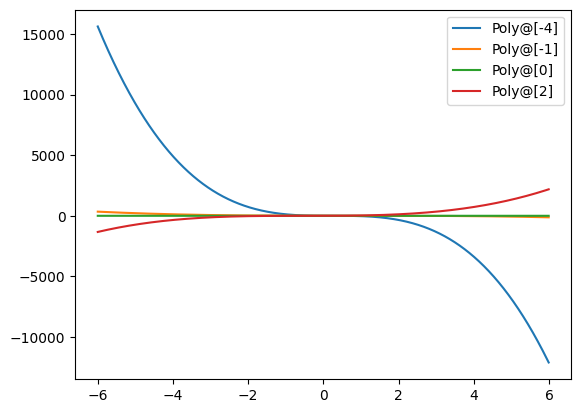

In [ ]:
# polynomial kernel
y = polynomial_kernel(prototypes, xpts, 1, 3) 
for i in range(len(prototypes)):
    label = "Poly@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show()

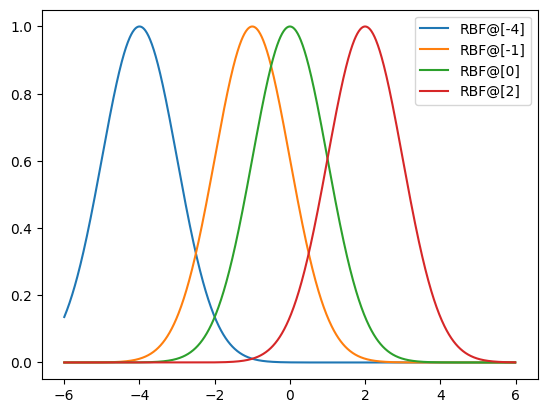

In [32]:
# RBF kernel
y = RBF_kernel(prototypes, xpts, 1) 
for i in range(len(prototypes)):
    label = "RBF@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show()

In [33]:
class Kernel_Machine(object):
    def __init__(self, kernel, prototype_points, weights):
        """
        参数：
            kernel(X1, X2) - 一个函数，返回 X1 和 X2 的行之间的交叉核矩阵
            prototype_points - 一个 Rxd 矩阵，其中每行是 mu_1,...,mu_R
            weights - 一个长度为 R 的向量，其中的条目是 w_1,...,w_R
        """
        self.kernel = kernel
        self.prototype_points = prototype_points
        self.weights = weights
        
    def predict(self, X):
        """
        在由 X 的各行给定的点上评估核机器
        参数：
            X - 一个 nxd 矩阵，其中每行是输入 x_1,...,x_n
        返回：
            核机器在 X 中 n 个点上的评估值向量。具体来说，返回向量的第 j 个条目是
                Sum_{i=1}^R w_i k(x_j, mu_i)
        """
        return self.kernel(X, self.prototype_points) @ self.weights

加载训练和测试数据；转换为列向量，以便能够更好地泛化到高维数据。

In [34]:
data_train,data_test = np.loadtxt("krr-train.txt"),np.loadtxt("krr-test.txt")
x_train, y_train = data_train[:,0].reshape(-1,1),data_train[:,1].reshape(-1,1)
x_test, y_test = data_test[:,0].reshape(-1,1),data_test[:,1].reshape(-1,1)

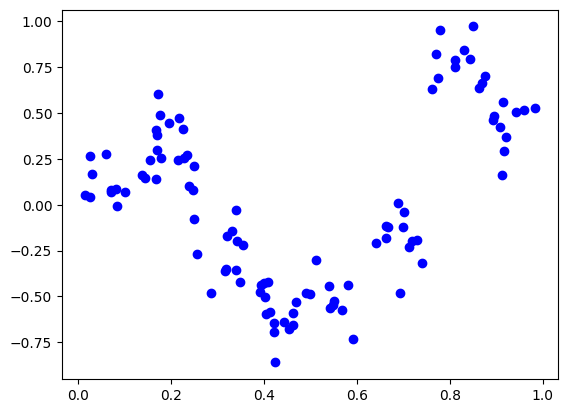

In [35]:
# plot training data
plt.plot(x_train, y_train, 'bo')
plt.show()

In [36]:
def train_kernel_ridge_regression(X, y, kernel, l2reg):
    """
    训练一个核岭回归模型
    参数：
        X - 一个 nxd 矩阵，其中每行是一个训练样本 x_1,...,x_n
        y - 一个长度为 n 的向量，其中每个条目是对应样本的目标值 y_1,...,y_n
        kernel - 一个函数，返回 X 的行之间的核矩阵
        l2reg - L2 正则化参数（岭回归中的 λ）
    返回：
        一个训练好的 Kernel_Machine 对象
    提示：
        1.计算核矩阵
        2.计算alpha权重
        3.返回一个 Kernel_Machine 对象
    """
    #TODO
    # 计算核矩阵
    K = kernel(X, X)

    # 计算alpha
    n = K.shape[0]
    alpha = np.linalg.solve(K + l2reg * np.eye(n), y)

    return Kernel_Machine(kernel=kernel, prototype_points=X, weights=alpha) #TODO


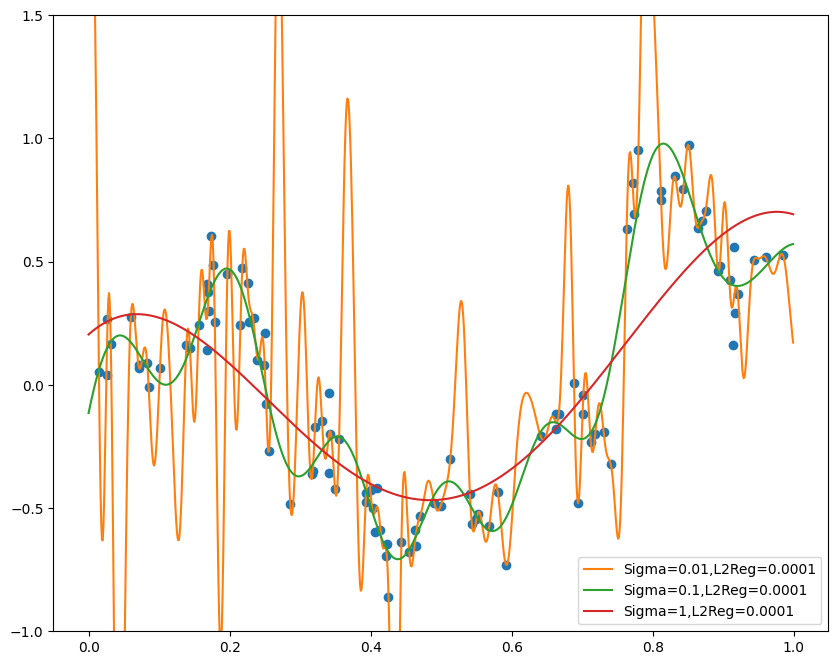

In [37]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.figure(figsize=(10, 8))
plt.plot(x_train,y_train,'o')
l2reg = 0.0001
for sigma in [.01,.1,1]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

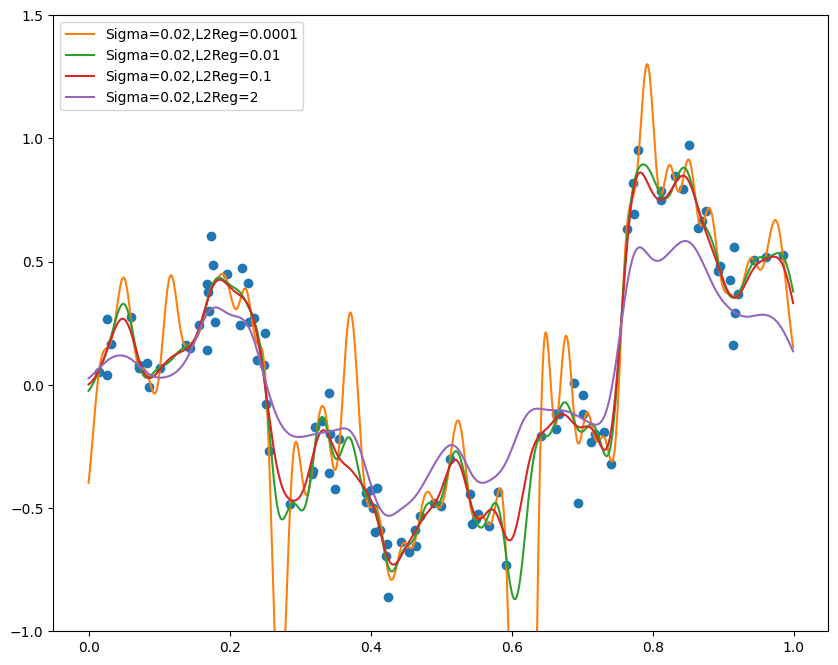

In [38]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.figure(figsize=(10, 8))
plt.plot(x_train, y_train,'o')
sigma= .02
for l2reg in [.0001,.01,.1,2]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

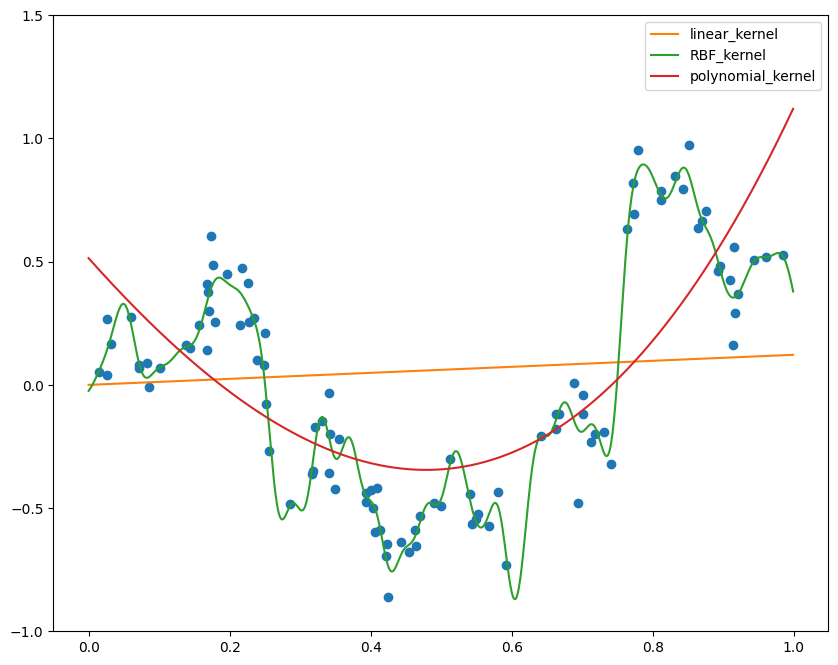

In [45]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.figure(figsize=(10, 8))
plt.plot(x_train, y_train,'o')
sigma= .02
l2reg= .01
"""
提示：for函数分不同核函数对训练结果进行可视化查看效果，
"""



for kernel_ in [linear_kernel, RBF_kernel, polynomial_kernel]:
    #TODO
    f = None
    if kernel_ == linear_kernel:
        f = train_kernel_ridge_regression(x_train, y_train, linear_kernel, l2reg=l2reg)
    elif kernel_ == RBF_kernel:
        k = functools.partial(RBF_kernel, sigma=sigma)
        f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    elif kernel_ == polynomial_kernel:
        k = functools.partial(polynomial_kernel, offset=1, degree=3)
        f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)

    label = str(kernel_.__name__)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()